In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test_results = pd.read_csv('test_results.csv')
user_table = pd.read_csv('user_table.csv')

In [4]:
combined = user_table.merge(test_results, on = 'user_id')
combined

,user_id,city,country,lat,long,timestamp,source,device,operative_system,test,price,converted
0,510335,Peabody,USA,42.53,-70.97,2015-05-02 12:06:41,ads-google,mobile,android,0,39,0
1,89568,Reno,USA,39.54,-119.82,2015-04-30 16:02:01,ads_facebook,mobile,android,1,59,0
2,434134,Rialto,USA,34.11,-117.39,2015-05-16 19:53:40,direct_traffic,web,windows,1,59,0
3,289769,Carson City,USA,39.15,-119.74,2015-04-23 18:50:58,ads_facebook,web,windows,0,39,0
4,939586,Chicago,USA,41.84,-87.68,2015-03-08 13:53:10,ads_facebook,mobile,iOS,1,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...
275611,485975,Atlanta,USA,33.76,-84.42,2015-05-31 09:42:07,ads_facebook,mobile,android,0,39,0
275612,35479,Los Angeles,USA,34.11,-118.41,2015-04-18 02:39:46,ads-bing,mobile,android,1,59,0
275613,516519,Chicago,USA,41.84,-87.68,2015-05-28 16:10:40,direct_traffic,mobile,iOS,0,39,0
275614,984877,Tampa,USA,27.96,-82.48,2015-04-17 22:02:55,direct_traffic,mobile,iOS,0,39,0


# Unique types of Sources
'ads-google', 'ads_facebook', 'ads_other', 'direct_traffic', 'ads-bing', 'ads-yahoo' \
'seo-google',  'seo-other', 'seo_facebook', 'seo-bing', 'seo-yahoo' \
'friend_referral'

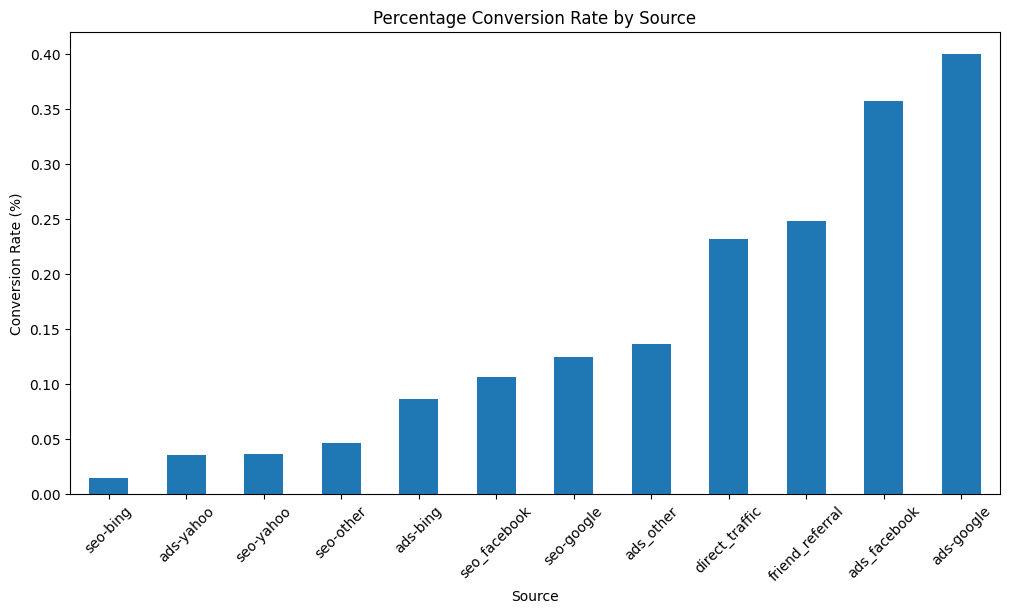

In [19]:
combined = combined.dropna()

# Calculate the conversion rate for each source
conversion_rate = combined.groupby('source')['converted'].sum()/len(combined) * 100

# Plot the conversion rate
plt.figure(figsize=(12, 6))
conversion_rate.sort_values().plot(kind='bar')
plt.title('Percentage Conversion Rate by Source')
plt.xlabel('Source')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [20]:
combined.to_csv('combined.csv', index = False)

In [ ]:
#qwe